# Linear Regression and Train/Test Split challenges

Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)

Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import pandas as pd
import numpy as np
import pickle
import re
import datetime as dt
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from operator import itemgetter, attrgetter, methodcaller

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [152]:
df=pd.read_csv('/Users/bellepeng/Desktop/Metis/sf18_ds11/challenges/challenges_data/2013_movies.csv')
print(df.shape)
df.head()

(100, 7)


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [4]:
%run '/Users/bellepeng/Desktop/Metis/Work/myfunctions.py'
# %load '/Users/bellepeng/Desktop/Metis/Work/myfunctions.py' will load it 

In [153]:
y=pd.DataFrame(df['DomesticTotalGross'])
X=df.drop(['DomesticTotalGross', 'Title'], axis=1)
X.shape

(100, 5)

In [154]:
# Encode Director and Rating
Director = pd.get_dummies(X.Director, prefix = 'Director')
Rating = pd.get_dummies(X.Rating, prefix = 'Rating')

X = X.join([Rating, Director], how="inner")
X.drop(['Director', 'Rating'], axis=1, inplace=True)
print(X.shape)
X.head()

(100, 100)


,Budget,Runtime,ReleaseDate,Rating_G,Rating_PG,Rating_PG-13,Rating_R,Director_Adam McKay,Director_Alan Taylor,Director_Alfonso Cuaron,...,Director_Spike Jonze,Director_Stephen Frears,Director_Steve McQueen (II),Director_Steven Soderbergh,Director_Thor Freudenthal,Director_Todd Phillips,Director_Tommy Wirkola,Director_Tyler Perry,Director_Woody Allen,Director_Zack Snyder
0,130000000.0,146,2013-11-22 00:00:00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200000000.0,129,2013-05-03 00:00:00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,150000000.0,108,2013-11-22 00:00:00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,76000000.0,98,2013-07-03 00:00:00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,225000000.0,143,2013-06-14 00:00:00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [155]:
# Transform the date
X['ReleaseDate'] = pd.to_datetime(X['ReleaseDate'])
# X.set_index('ReleaseDate', inplace=True)
print(X.shape)
X.head()

(100, 100)


,Budget,Runtime,ReleaseDate,Rating_G,Rating_PG,Rating_PG-13,Rating_R,Director_Adam McKay,Director_Alan Taylor,Director_Alfonso Cuaron,...,Director_Spike Jonze,Director_Stephen Frears,Director_Steve McQueen (II),Director_Steven Soderbergh,Director_Thor Freudenthal,Director_Todd Phillips,Director_Tommy Wirkola,Director_Tyler Perry,Director_Woody Allen,Director_Zack Snyder
0,130000000.0,146,2013-11-22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200000000.0,129,2013-05-03,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,150000000.0,108,2013-11-22,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,76000000.0,98,2013-07-03,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,225000000.0,143,2013-06-14,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


__Challenge 1__  
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

Text(0,0.5,'Residuals')

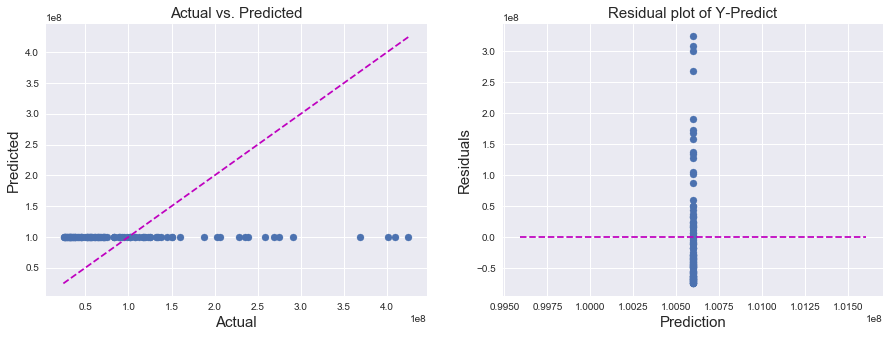

In [129]:
# 1.006e+08 is the average, a horizontal line that predicts the Domestial Total Gross. 
# Residuals are all the same, because we gave everyone the same prediction, therefore not normally distributed. 
constants = [1]*len(y)
model = sm.OLS(y, constants)
fit = model.fit()
fit.summary()

pred = fit.predict(constants)
pred = pd.DataFrame(pred, columns=['DomesticTotalGross'])

plt.figure(figsize=(15,5))
res = y - pd.DataFrame(pred, columns=['DomesticTotalGross'])

plt.subplot(1, 2, 1)
plt.scatter(y, pred)
plt.plot(np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
     np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
    color='m', linestyle='--')
plt.title("Actual vs. Predicted", size=15)
plt.xlabel("Actual", size=15)
plt.ylabel("Predicted", size=15)

plt.subplot(1, 2, 2)
plt.scatter(pred, res)
plt.plot(np.linspace(pred.min()-0.01*np.mean(pred), pred.max()+0.01*np.mean(pred), 1000),
         np.linspace(0, 0, 1000),
         color='m', linestyle='--')
plt.title("Residual plot of Y-Predict", size=15)
plt.xlabel("Prediction", size=15)
plt.ylabel("Residuals", size=15)

__Challenge 2__  
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?  

A: The residuals indicate there is heterosdascecity. The variance grows as y grows.

In [130]:
X2 = pd.DataFrame(X['Budget'])
X2['Budget'][X2['Budget'].isnull()]=X2['Budget'].median()
X2['Budget'].isnull().sum()

0

Text(0,0.5,'Residuals')

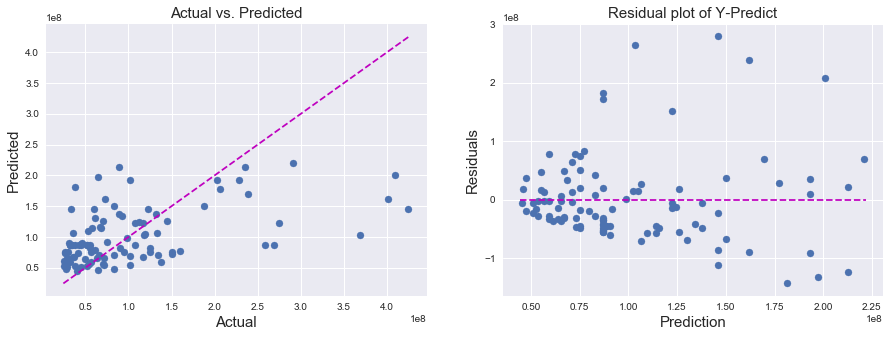

In [134]:
model = sm.OLS(y, sm.add_constant(X2))
fit = model.fit()
fit.summary()

pred = fit.predict(sm.add_constant(X2))
pred = pd.DataFrame(pred, columns=['DomesticTotalGross'])

plt.figure(figsize=(15,5))
res = y - pd.DataFrame(pred, columns=['DomesticTotalGross'])

plt.subplot(1, 2, 1)
plt.scatter(y, pred)
plt.plot(np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
     np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
    color='m', linestyle='--')
plt.title("Actual vs. Predicted", size=15)
plt.xlabel("Actual", size=15)
plt.ylabel("Predicted", size=15)

plt.subplot(1, 2, 2)
plt.scatter(pred, res)
plt.plot(np.linspace(pred.min()-0.01*np.mean(pred), pred.max()+0.01*np.mean(pred), 1000),
         np.linspace(0, 0, 1000),
         color='m', linestyle='--')
plt.title("Residual plot of Y-Predict", size=15)
plt.xlabel("Prediction", size=15)
plt.ylabel("Residuals", size=15)

__Challenge 3__  
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

A: still seeing heterosdascecity

In [144]:
X3 = X[['Budget', 'Rating_G', 'Rating_PG', 'Rating_PG-13', 'Rating_R']]
X3['Budget'][X3['Budget'].isnull()]=X3['Budget'].median()
X3['Budget'].isnull().sum()
X3.head()

,Budget,Rating_G,Rating_PG,Rating_PG-13,Rating_R
0,130000000.0,0,0,1,0
1,200000000.0,0,0,1,0
2,150000000.0,0,1,0,0
3,76000000.0,0,1,0,0
4,225000000.0,0,0,1,0


Text(0,0.5,'Residuals')

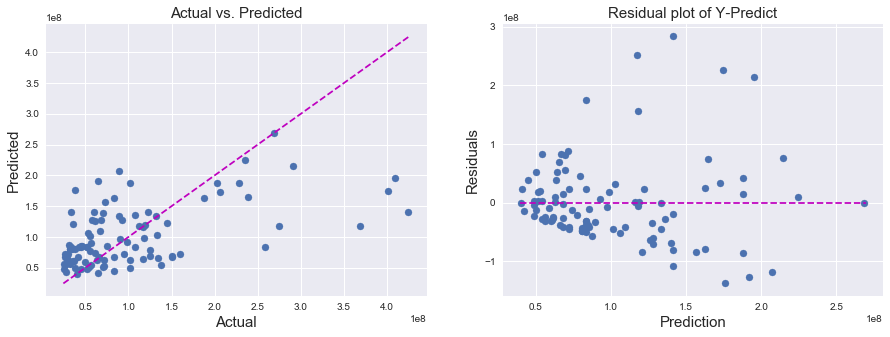

In [140]:
model = sm.OLS(y, sm.add_constant(X3))
fit = model.fit()
fit.summary()

pred = fit.predict(sm.add_constant(X3))
pred = pd.DataFrame(pred, columns=['DomesticTotalGross'])

plt.figure(figsize=(15,5))
res = y - pd.DataFrame(pred, columns=['DomesticTotalGross'])

plt.subplot(1, 2, 1)
plt.scatter(y, pred)
plt.plot(np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
     np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
    color='m', linestyle='--')
plt.title("Actual vs. Predicted", size=15)
plt.xlabel("Actual", size=15)
plt.ylabel("Predicted", size=15)

plt.subplot(1, 2, 2)
plt.scatter(pred, res)
plt.plot(np.linspace(pred.min()-0.01*np.mean(pred), pred.max()+0.01*np.mean(pred), 1000),
         np.linspace(0, 0, 1000),
         color='m', linestyle='--')
plt.title("Residual plot of Y-Predict", size=15)
plt.xlabel("Prediction", size=15)
plt.ylabel("Residuals", size=15)

__Challenge 4__  
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

A: added more features, logged the budget and gross domestic total, but did not improve the residuals.

In [179]:
X4=X[['Budget', 'Runtime', 'Rating_G', 'Rating_PG', 'Rating_PG-13', 'Rating_R']]
X4['Budget'][X4['Budget'].isnull()]=X4['Budget'].median()
X4['Budget_log']=np.log(X4['Budget'])
X4.drop(['Budget'], axis=1, inplace=True)
print(X4.shape)
X4.head()

(100, 6)


,Runtime,Rating_G,Rating_PG,Rating_PG-13,Rating_R,Budget_log
0,146,0,0,1,0,18.683045
1,129,0,0,1,0,19.113828
2,108,0,1,0,0,18.826146
3,98,0,1,0,0,18.146244
4,143,0,0,1,0,19.231611


In [181]:
y_log=np.log(y)
y_log.head()

,DomesticTotalGross
0,19.866818
1,19.829260
2,19.808818
3,19.723760
4,19.488990


Text(0,0.5,'Residuals')

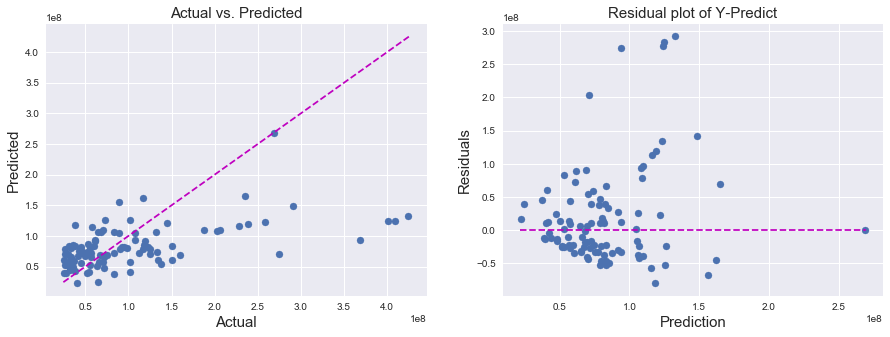

In [194]:
model = sm.OLS(y_log, sm.add_constant(X4))
fit = model.fit()
fit.summary()

pred_orig = fit.predict(sm.add_constant(X4))
pred_orig = pd.DataFrame(pred_orig, columns=['DomesticTotalGross'])
pred2 = np.exp(pred_orig)

plt.figure(figsize=(15,5))
res = y - pd.DataFrame(pred2, columns=['DomesticTotalGross'])

plt.subplot(1, 2, 1)
plt.scatter(y, pred2)
plt.plot(np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
     np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
    color='m', linestyle='--')
plt.title("Actual vs. Predicted", size=15)
plt.xlabel("Actual", size=15)
plt.ylabel("Predicted", size=15)

plt.subplot(1, 2, 2)
plt.scatter(pred2, res)
plt.plot(np.linspace(pred.min()-0.01*np.mean(pred), pred.max()+0.01*np.mean(pred), 1000),
         np.linspace(0, 0, 1000),
         color='m', linestyle='--')
plt.title("Residual plot of Y-Predict", size=15)
plt.xlabel("Prediction", size=15)
plt.ylabel("Residuals", size=15)

__Challenge 5__
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.  

A: 

In [216]:
y_test.shape

(25, 1)

Text(0,0.5,'Residuals')

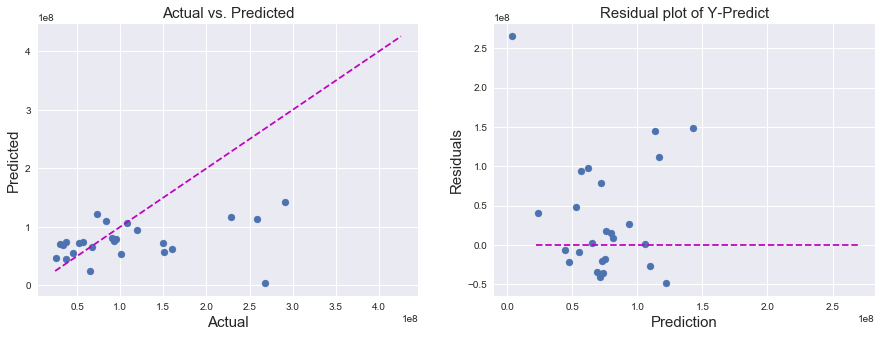

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X4, y_log, test_size=0.25, random_state=99)

model5 = sm.OLS(y_train, sm.add_constant(X_train))
fit5 = model5.fit()
fit5.summary()

pred5 = fit5.predict(sm.add_constant(X_test))
pred5 = pd.DataFrame(pred5, columns=['DomesticTotalGross'])
pred5 = np.exp(pred5)
y_test_orig=np.exp(y_test)

plt.figure(figsize=(15,5))
res = y_test_orig - pd.DataFrame(pred5, columns=['DomesticTotalGross'])

plt.subplot(1, 2, 1)
plt.scatter(y_test_orig, pred5)
plt.plot(np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
     np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
    color='m', linestyle='--')
plt.title("Actual vs. Predicted", size=15)
plt.xlabel("Actual", size=15)
plt.ylabel("Predicted", size=15)

plt.subplot(1, 2, 2)
plt.scatter(pred5, res)
plt.plot(np.linspace(pred.min()-0.01*np.mean(pred5), pred.max()+0.01*np.mean(pred5), 1000),
         np.linspace(0, 0, 1000),
         color='m', linestyle='--')
plt.title("Residual plot of Y-Predict", size=15)
plt.xlabel("Prediction", size=15)
plt.ylabel("Residuals", size=15)